<div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> FIFA 21 PLAYER VALUE PREDICTION AND EDA</div>

<center>
<img style="align:center;" src="https://esportimes.com/wp-content/uploads/2021/04/FIFA-21-Esporttimes-1.jpg" width=900>
</center>

<div style="padding:20px; 
            color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500;
            width:1300px"> TABLE OF CONTENT</div>


<div style="padding:5px; 
            color:#FBCB0A;
            margin:5px;
            font-size:120%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:200px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500;
            width:1340px"> 

<a id='1' style="color:#FBCB0A ">1. IMPORTING LIBRARIES</a>

<a id='2' style="color:#FBCB0A ">2. LOADING DATASET</a>

<a id='3' style="color:#FBCB0A ">3. DATA DESCRIPTION</a>

<a id='4' style="color:#FBCB0A ">4. EXPLORATORY DATA ANALYSIS</a>

<a id='5' style="color:#FBCB0A ">5. MISSING VALUES</a>

<a id='6' style="color:#FBCB0A ">6. FEATURE ENGINEERING</a>

<a id='7' style="color:#FBCB0A ">7. DATA VISUALIZATION</a>

<a id='8' style="color:#FBCB0A ">8. OUTLIER DETECTION</a>

<a id='9' style="color:#FBCB0A ">9. DATA PREPROCESSING</a>

<a id='10' style="color:#FBCB0A ">10. MODEL TRAINING AND EVALUATING</a>

<a id='11' style="color:#FBCB0A ">11 PCA AND LDA</a>

<a id='12' style="color:#FBCB0A ">12. MODEL TUNING</a>

<a id='13' style="color:#FBCB0A ">13. CONCLUSION</a>

                      
</div>


<a id='1'></a>
<div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> IMPORTING LIBRARIES</div>


In [382]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

<a id='2'></a>
<div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> LOADING DATASET</div>

In [383]:
data=pd.read_csv("players_21.csv")
df=data.copy()
df.drop(["ls","st","rb","rcb","cb","lcb","lb","rwb","rdm","cdm","ldm","lwb","rm","rcm","cm","rs","lcm","lm","ram","cam","lam","rw","rf","cf","lf","lw"],axis=1,inplace=True)
df.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

<a id='3'></a>
<div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> DATA DESCRIPTION</div>


### DATA CONTENT:

* Every player available in FIFA 21
* 100+ attributes
* URL of the scraped players
* Player positions, with the role in the club and in the national team
* Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.
* Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.


<a id='4'></a>
<div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> EXPLORATORY DATA ANALYSIS</div>

In [384]:
print('Shape of the data:',df.shape)
print("****************************")
print('Columns of the data:',df.columns)
print("****************************")
print('Number of unique values:',df.nunique())
print("****************************")
print('Number of duplicated values:',df.duplicated().sum())

Shape of the data: (18944, 80)
****************************
Columns of the data: Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill

In [385]:
df.dtypes

sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club_name                      object
league_name                    object
league_rank                   float64
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
body_type                      object
real_face                      object
release_clause_eur            float64
player_tags                    object
team_positio

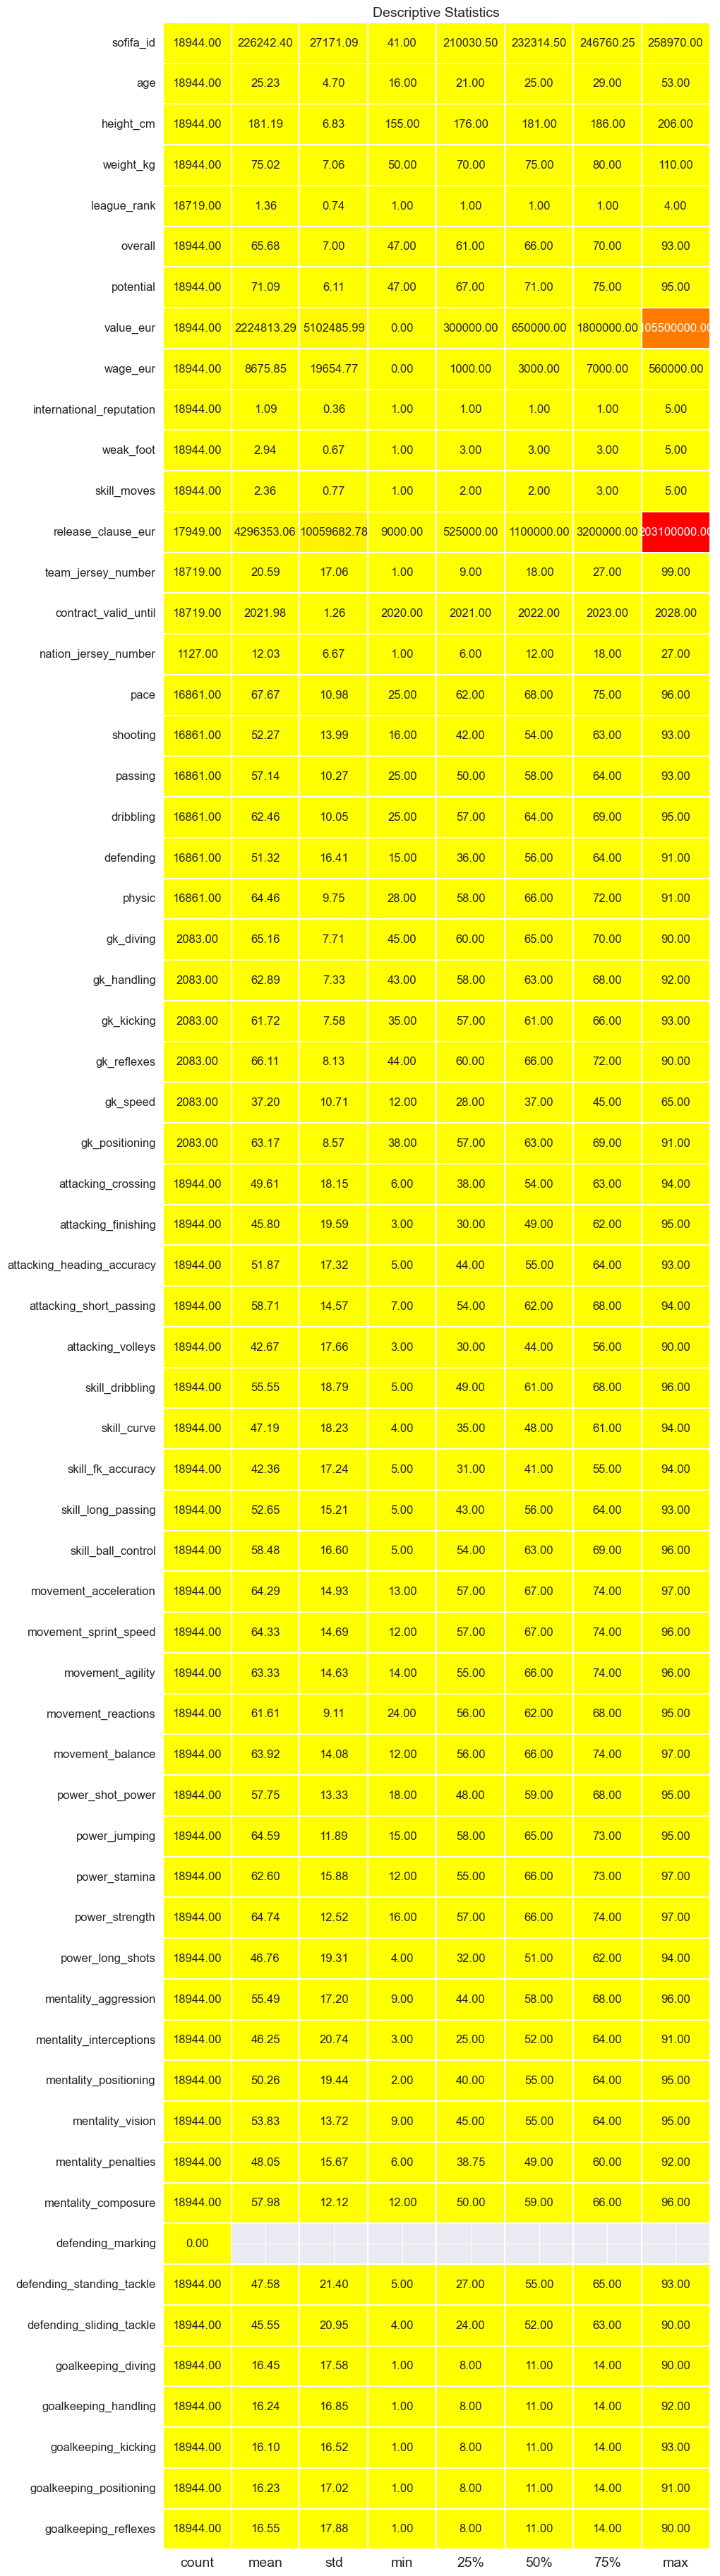

In [386]:
# describe the data
cols=df.select_dtypes(include=['float64','int64'])
cmap1 = 'autumn_r'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)

    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18944 non-null  int64  
 1   player_url                  18944 non-null  object 
 2   short_name                  18944 non-null  object 
 3   long_name                   18944 non-null  object 
 4   age                         18944 non-null  int64  
 5   dob                         18944 non-null  object 
 6   height_cm                   18944 non-null  int64  
 7   weight_kg                   18944 non-null  int64  
 8   nationality                 18944 non-null  object 
 9   club_name                   18719 non-null  object 
 10  league_name                 18719 non-null  object 
 11  league_rank                 18719 non-null  float64
 12  overall                     18944 non-null  int64  
 13  potential                   189

In [388]:
import researchpy as rp

num_cols = df.select_dtypes(include = np.number).columns
rp.summary_cont(df[num_cols]).style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

<a id='5'></a>
<div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> FEATURE ENGINEERING</div>

In [389]:
# convert object features to datetime

from datetime import datetime as dt

df["dob"]=pd.to_datetime(df["dob"])
df["joined"]=pd.to_datetime(df["joined"])

df["born_year"]=df["dob"].dt.year

# converting value features:

df["value_eur"]=df["value_eur"]/1000000
df["wage_eur"]=(df["wage_eur"]*48)/1000000
df["release_clause_eur"]=df["release_clause_eur"]/1000000

#RENAME THE  COLUMNS:
df.rename(columns={"value_eur":"value_eur_m","wage_eur":"wage_eur_m","release_clause_eur":"release_clause_eur_m"},inplace=True)

# cCREATE NEW FEATURES:

# league value
df["league_value_T"]=df.groupby("league_name")["value_eur_m"].transform("sum")/1000

# position_area(attack,defense,midfield,goalkeeper):

df["team_position"]=df["team_position"].apply(lambda x: "attack" if x in ["LS","ST","RS","LW","LF","CF","RF","RW"] 
                                              else ("defense" if x in ["LWB","LB","LCB","CB","RCB","RB"] else 
                                                    ("midfield" if x in ["LDM","CDM","RDM","LM","LCM","CM","RCM","RM","LAM","CAM","RAM"] 
                                                     else("goalkeeper" if x in ["GK"] else "none"))))


# loyalty feature: how many years the player has been in the club
df["loyalty"]=2020-df["joined"].dt.year

# body type availablity

df["body_type"]=df["body_type"].apply(lambda x: "not famous" if x.startswith("PLAYER_BODY_TYPE_") else "famous")

                                                                                 
# number of player traits:

df["player_traits"]=df["player_traits"].apply(lambda x: len(x.split(",")) if type(x)==str else 0)

# team quelity:

vf=df.groupby("club_name")[["value_eur_m"]].sum().sort_values(by="value_eur_m",ascending=False).head(500)

df["team_quality"]=df["club_name"].apply(lambda x: "hight_quality" if x in vf.index else "low_quality")


df.head()


sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age        dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33 1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35 1985-02-05   
2           J. Oblak                            Jan Oblak   27 1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31 1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28 1992-02-05   

   height_cm  weight_kg nationality            club_name  \
0        170         72   Argentina         FC Barcelona   
1        187         83    Portugal             Juventus   
2        188         87    Slovenia      Atlético Madrid   
3        184         80      Poland    FC Bayern München   
4        175         68      Brazil  Paris Saint-Germain   

              league_name  league_rank  overall  potential  value_eur_m  \
0  Spain Primera Division         1.00       93         93        67.50   
1         Italian Serie A         1.00       92         92        46.00   
2  Spain Primera Division         1.00       91         93        75.00   
3    German 1. Bundesliga         1.00       91         91        80.00   
4          French Ligue 1         1.00       91         91        90.00   

   wage_eur_m player_positions preferred_foot  international_reputation  \
0       26.88       RW, ST, CF           Left                         5   
1       10.56           ST, LW          Right                         5   
2        6.00               GK          Right                         3   
3       11.52               ST          Right                         4   
4       12.96          LW, CAM          Right                         5   

   weak_foot  skill_moves      work_rate   body_type real_face  \
0          4            4     Medium/Low      famous       Yes   
1          4            5       High/Low      famous       Yes   
2          3            1  Medium/Medium  not famous       Yes   
3          4            4    High/Medium  not famous       Yes   
4          5            5    High/Medium      famous       Yes   

   release_clause_eur_m                                        player_tags  \
0                138.40  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1                 75.90  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
2                159.40                                                NaN   
3                132.00              #Distance Shooter, #Clinical Finisher   
4                166.50  #Speedster, #Dribbler, #Playmaker, #FK Special...   

  team_position  team_jersey_number loaned_from     joined  \
0      midfield               10.00         NaN 2004-07-01   
1        attack                7.00         NaN 2018-07-10   
2    goalkeeper               13.00         NaN 2014-07-16   
3        attack                9.00         NaN 2014-07-01   
4        attack               10.00         NaN 2017-08-03   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0               2021.00              RW                 10.00 85.00     92.00   
1               2022.00              LS                  7.00 89.00     93.00   
2               2023.00              GK                  1.00   NaN       NaN   
3               2023.00             NaN                   NaN 78.00     91.00   
4               2022.00             NaN                   NaN 91.00     85.00   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0    91.00      95.00      38.00   65.00        NaN          NaN    

<a id='#6'></a>
<div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> MISSING VALUES</div>

In [390]:
df.tail().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

In [391]:
# check the missing values
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur_m                       0
wage_eur_m                        0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur_m            995
player_tags                   17536
team_position                     0
team_jersey_number          

In [392]:
# show the missing values in dataset with ratio
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_tabl(df)

n_miss  ratio
defending_marking      18944 100.00
loaned_from            18186  96.00
nation_position        17817  94.05
nation_jersey_number   17817  94.05
player_tags            17536  92.57
gk_reflexes            16861  89.00
gk_kicking             16861  89.00
gk_handling            16861  89.00
gk_diving              16861  89.00
gk_speed               16861  89.00
gk_positioning         16861  89.00
pace                    2083  11.00
shooting                2083  11.00
dribbling               2083  11.00
defending               2083  11.00
physic                  2083  11.00
passing                 2083  11.00
release_clause_eur_m     995   5.25
loyalty                  983   5.19
joined                   983   5.19
league_name              225   1.19
contract_valid_until     225   1.19
team_jersey_number       225   1.19
league_rank              225   1.19
league_value_T           225   1.19
club_name                225   1.19

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5, 50.5, 52.5, 54.5, 56.5, 58.5, 60.5, 62.5, 64.5,
        66.5, 68.5, 70.5, 72.5, 74.5, 76.5, 78.5, 80.5, 82.5]),
 [Text(0.5, 0, 'sofifa_id'),
  Text(2.5, 0, 'short_name'),
  Text(4.5, 0, 'age'),
  Text(6.5, 0, 'height_cm'),
  Text(8.5, 0, 'nationality'),
  Text(10.5, 0, 'league_name'),
  Text(12.5, 0, 'overall'),
  Text(14.5, 0, 'value_eur_m'),
  Text(16.5, 0, 'player_positions'),
  Text(18.5, 0, 'international_reputation'),
  Text(20.5, 0, 'skill_moves'),
  Text(22.5, 0, 'body_type'),
  Text(24.5, 0, 'release_clause_eur_m'),
  Text(26.5, 0, 'team_position'),
  Text(28.5, 0, 'loaned_from'),
  Text(30.5, 0, 'contract_valid_until'),
  Text(32.5, 0, 'nation_jersey_number'),
  Text(34.5, 0, 'shooting'),
  Text(36.5, 0, 'dribbling'),
  Text(38.5, 0, 'physic'),
  Text(40.5, 0, 'gk_handling'),
  Text(42.5, 0, 'gk_reflexes'

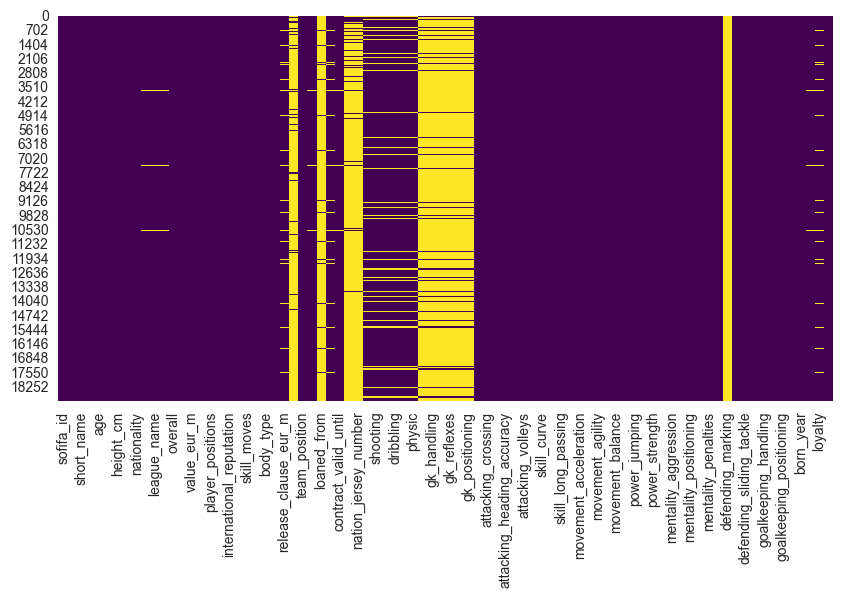

In [393]:
# visualize the missing values with heatmap

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.xticks(rotation=90)


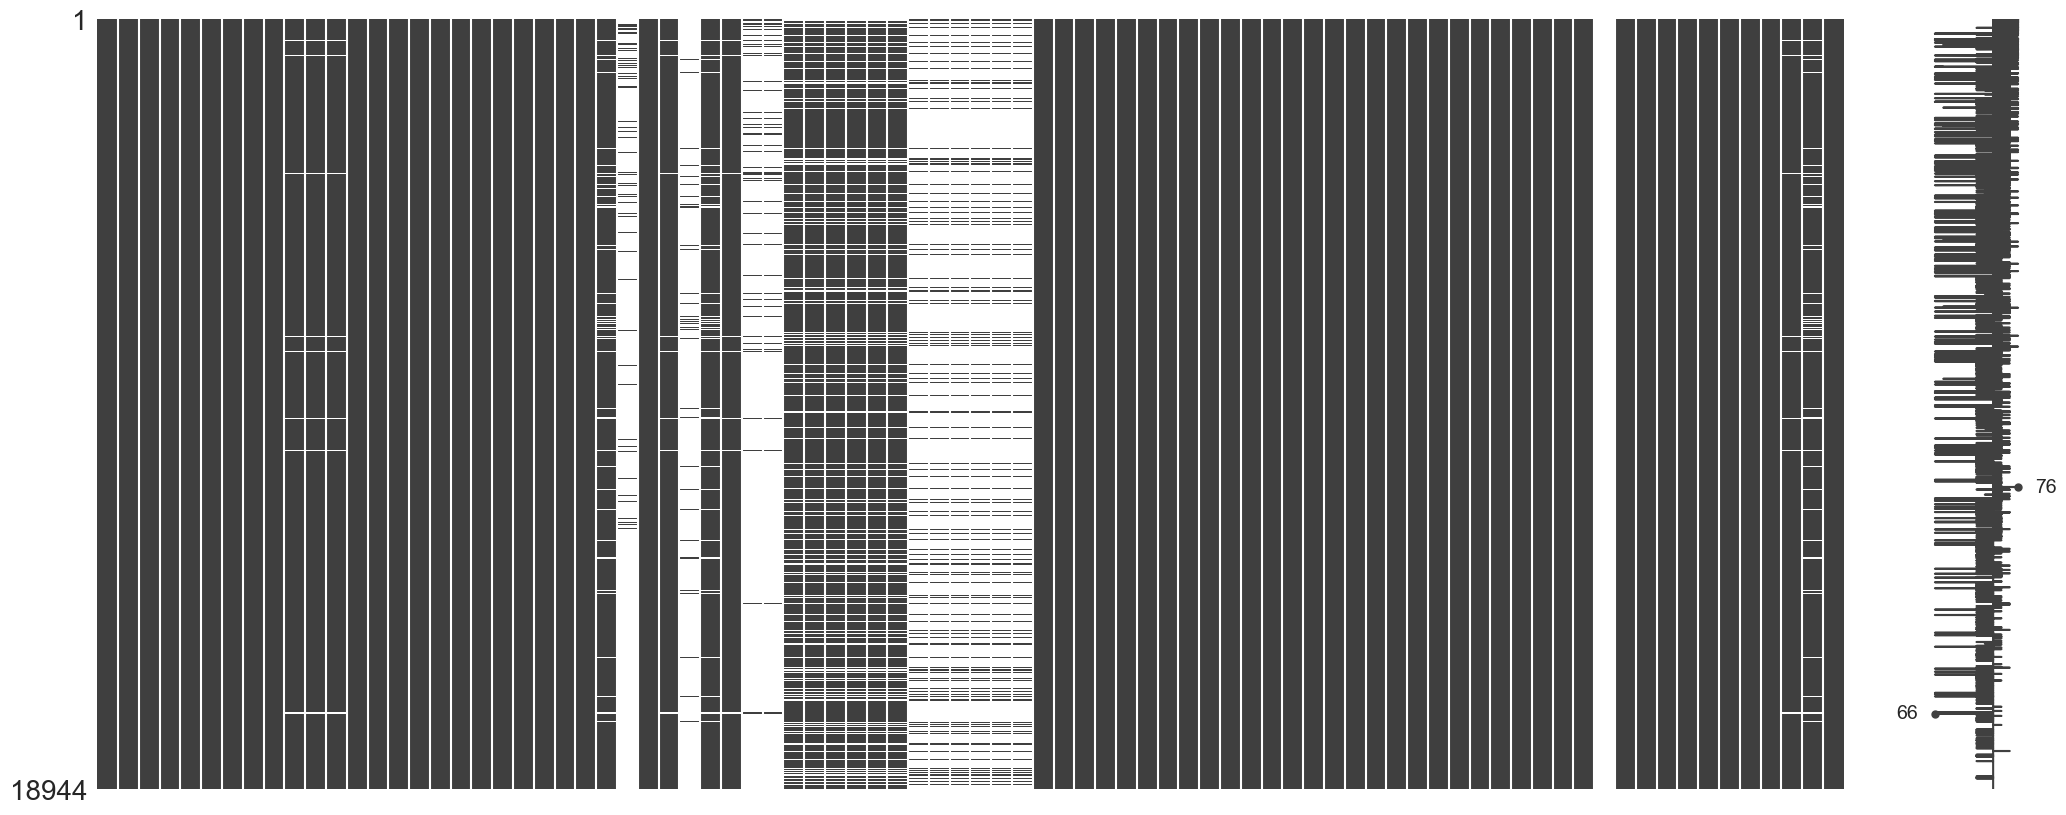

In [394]:
# visualize the missing values with barplot
import missingno as msno
msno.matrix(df);
plt.show()

In [395]:
# handling the missing values by using KNN imputer

num=df.select_dtypes(include=['float64','int64'])


for i in df.columns:
    if df[i].isnull().sum()>len(df)*0.90:
        df.drop(i,axis=1,inplace=True)
     
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur_m                       0
wage_eur_m                        0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur_m            995
team_position                     0
team_jersey_number              225
joined                      

In [396]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=15)
num=df.select_dtypes(include=['float64','int64'])    
for i in num.columns:
   df[i]=knn.fit_transform(df[[i]])
      
df.isnull().sum()

sofifa_id                       0
player_url                      0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club_name                     225
league_name                   225
league_rank                     0
overall                         0
potential                       0
value_eur_m                     0
wage_eur_m                      0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
release_clause_eur_m            0
team_position                   0
team_jersey_number              0
joined                        983
contract_valid_until            0
pace          

<a id='7'></a>
<div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> DATA VISUALIZATION</div>

Text(0.5, 1.0, 'Correlation Between Features')

<Figure size 4000x2000 with 0 Axes>

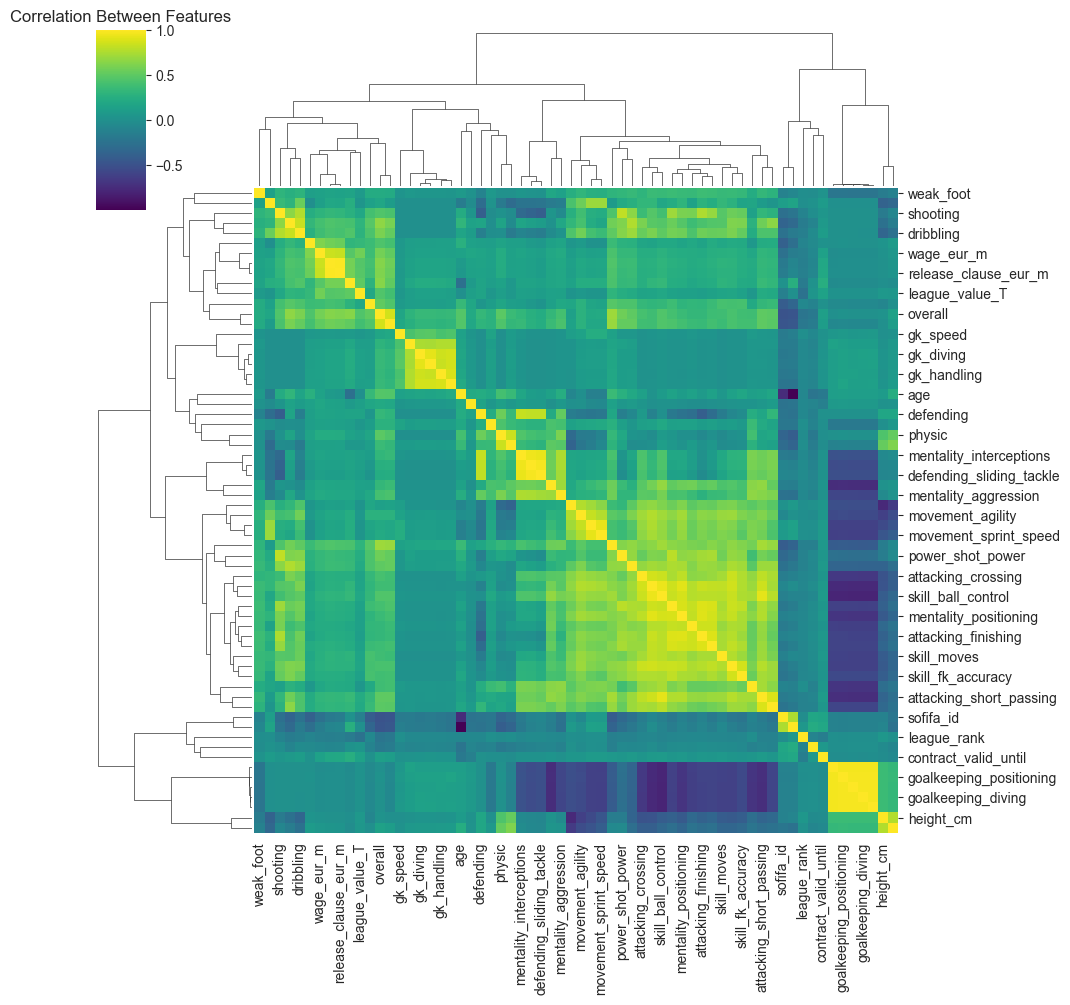

In [397]:
# check the correlation between the features

# correlation matrix:
corr=df.iloc[:,0:78].corr()
plt.figure(figsize=(40,20))
sns.clustermap(corr,cmap="viridis")
plt.title("Correlation Between Features")

       preferred_foot  Ratio
Right           14448  76.27
Left             4496  23.73
##########################################


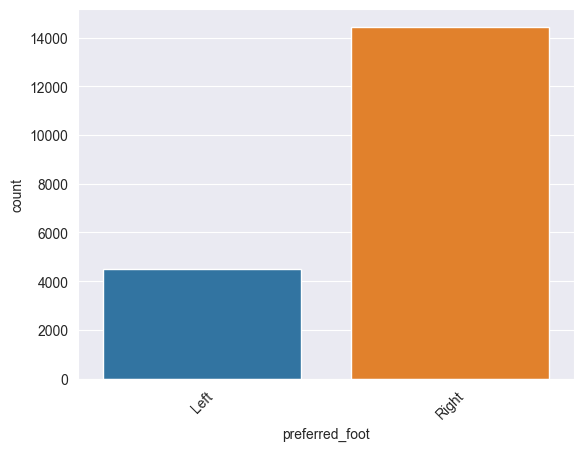

               work_rate  Ratio
Medium/Medium       9980  52.68
High/Medium         3455  18.24
Medium/High         1798   9.49
High/High           1031   5.44
Medium/Low           913   4.82
High/Low             786   4.15
Low/Medium           482   2.54
Low/High             446   2.35
Low/Low               53   0.28
##########################################


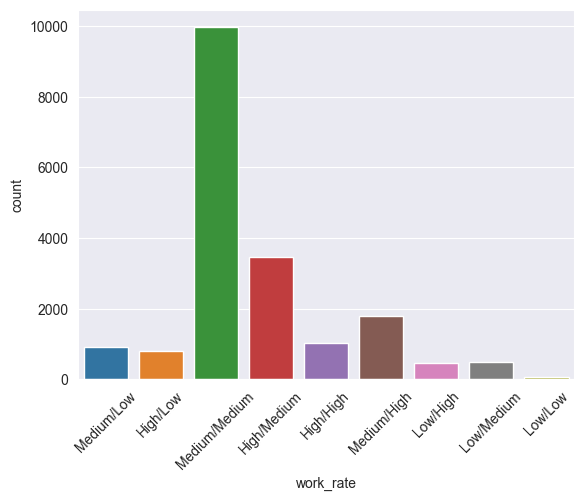

            body_type  Ratio
famous          18836  99.43
not famous        108   0.57
##########################################


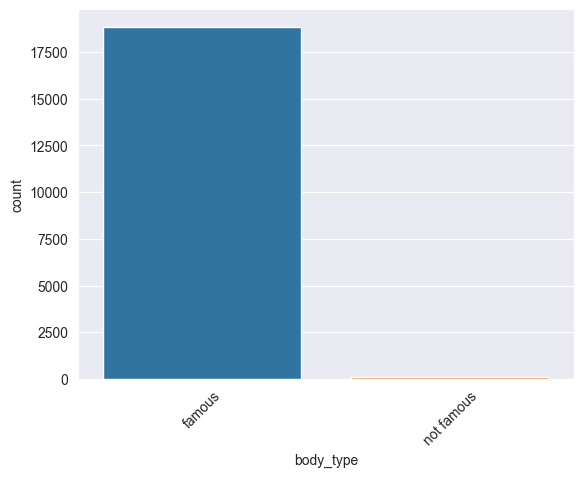

     real_face  Ratio
No       16746  88.40
Yes       2198  11.60
##########################################


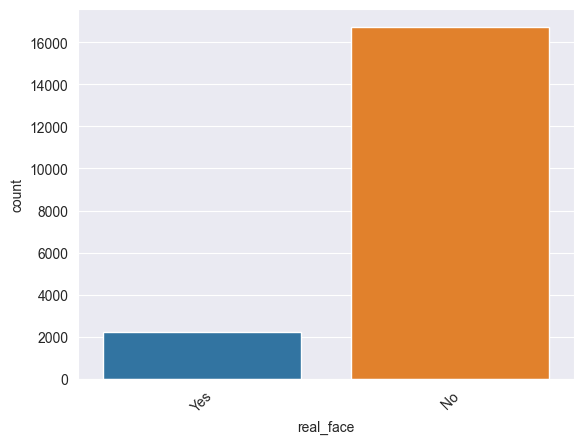

            team_position  Ratio
none                11531  60.87
midfield             2779  14.67
defense              2674  14.12
attack               1279   6.75
goalkeeper            681   3.59
##########################################


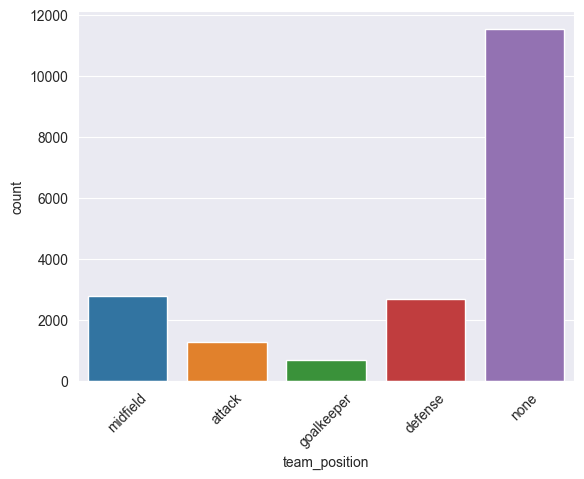

               team_quality  Ratio
hight_quality         14075  74.30
low_quality            4869  25.70
##########################################


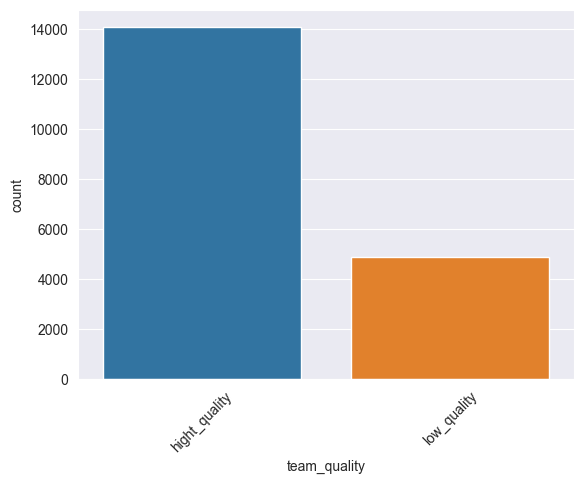

In [398]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() <= 10]
num_cols = [col for col in df.columns if df[col].dtypes != "O"]



def cat_summary(df,col,plot=False):
    print(pd.DataFrame({col:df[col].value_counts(),
                       "Ratio":100*df[col].value_counts()/len(df)}))
    print("##########################################")
    if plot:
        sns.countplot(x=col,data=df)
        plt.xticks(rotation=45)
        plt.show()

for i in cat_cols:
    cat_summary(df,i,plot=True)

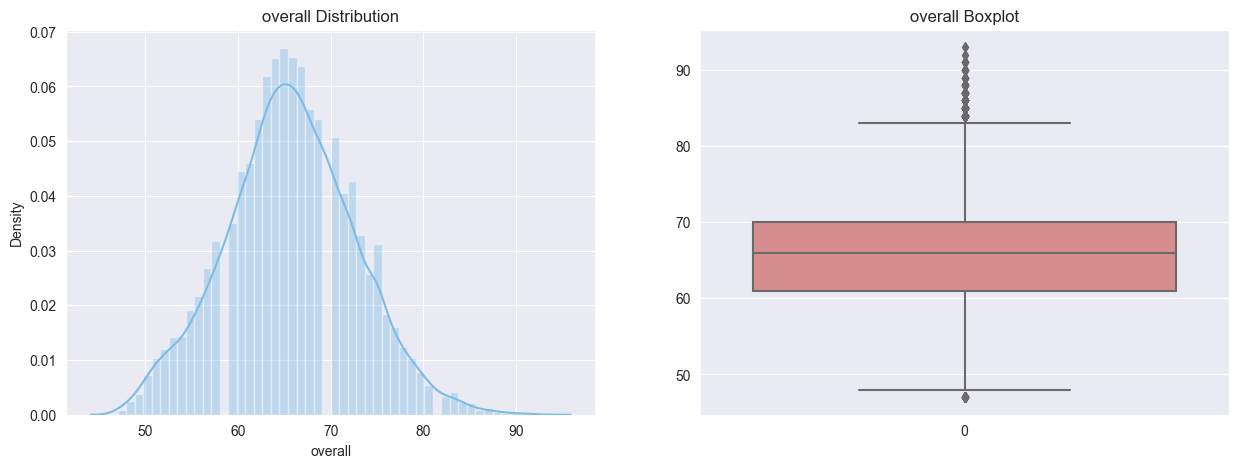

count   18944.00
mean       65.68
std         7.00
min        47.00
25%        61.00
50%        66.00
75%        70.00
max        93.00
Name: overall, dtype: float64
Skewness: 0.089313
Kurtosis: -0.002538
****************************


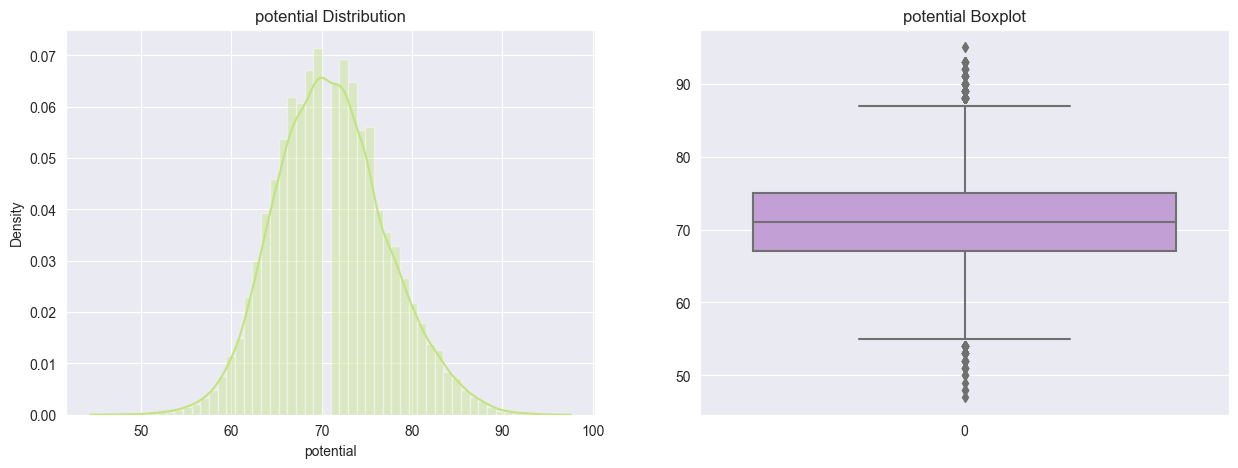

count   18944.00
mean       71.09
std         6.11
min        47.00
25%        67.00
50%        71.00
75%        75.00
max        95.00
Name: potential, dtype: float64
Skewness: 0.217394
Kurtosis: 0.092657
****************************


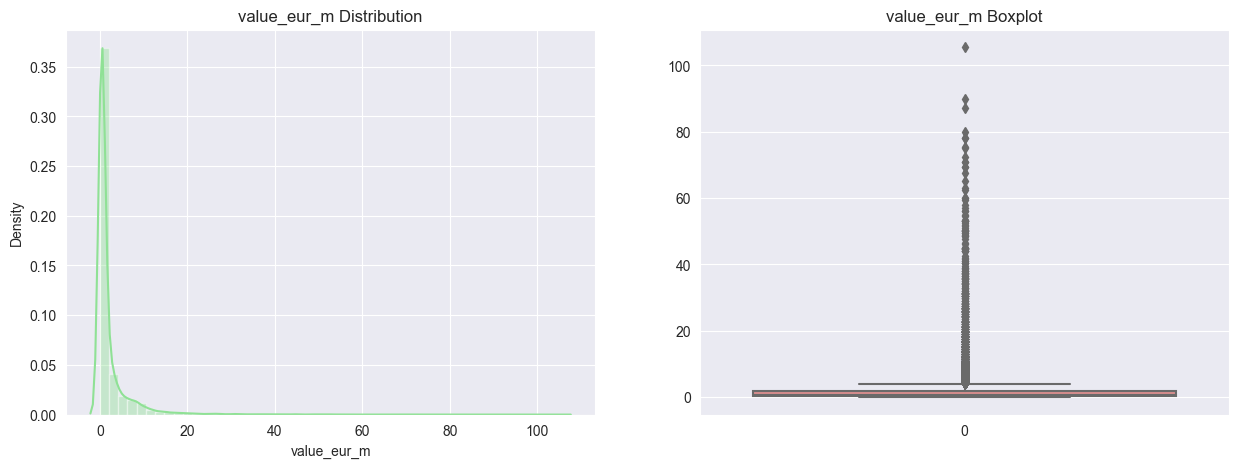

count   18944.00
mean        2.22
std         5.10
min         0.00
25%         0.30
50%         0.65
75%         1.80
max       105.50
Name: value_eur_m, dtype: float64
Skewness: 6.727281
Kurtosis: 68.855929
****************************


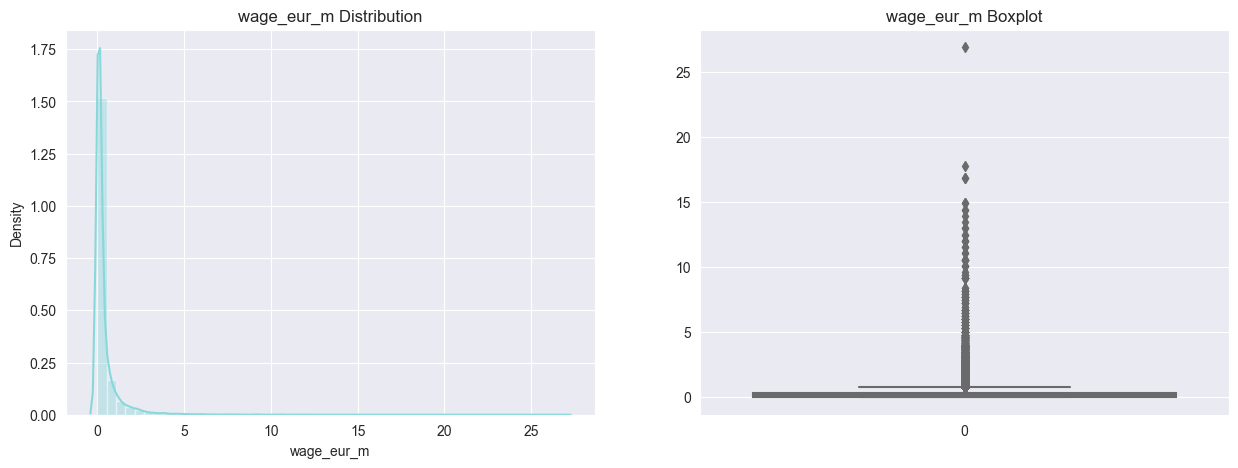

count   18944.00
mean        0.42
std         0.94
min         0.00
25%         0.05
50%         0.14
75%         0.34
max        26.88
Name: wage_eur_m, dtype: float64
Skewness: 7.484533
Kurtosis: 96.591958
****************************


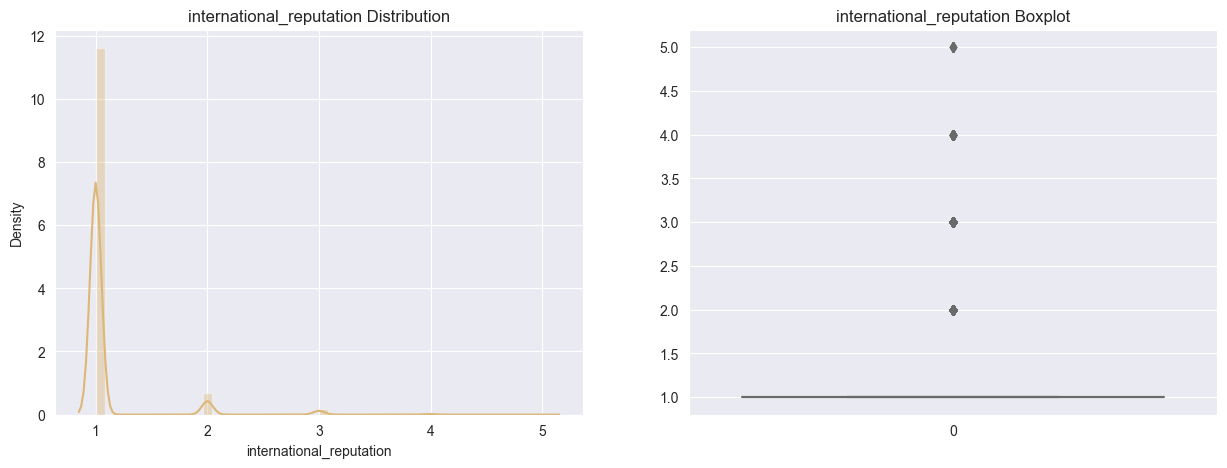

count   18944.00
mean        1.09
std         0.36
min         1.00
25%         1.00
50%         1.00
75%         1.00
max         5.00
Name: international_reputation, dtype: float64
Skewness: 4.618014
Kurtosis: 24.559540
****************************


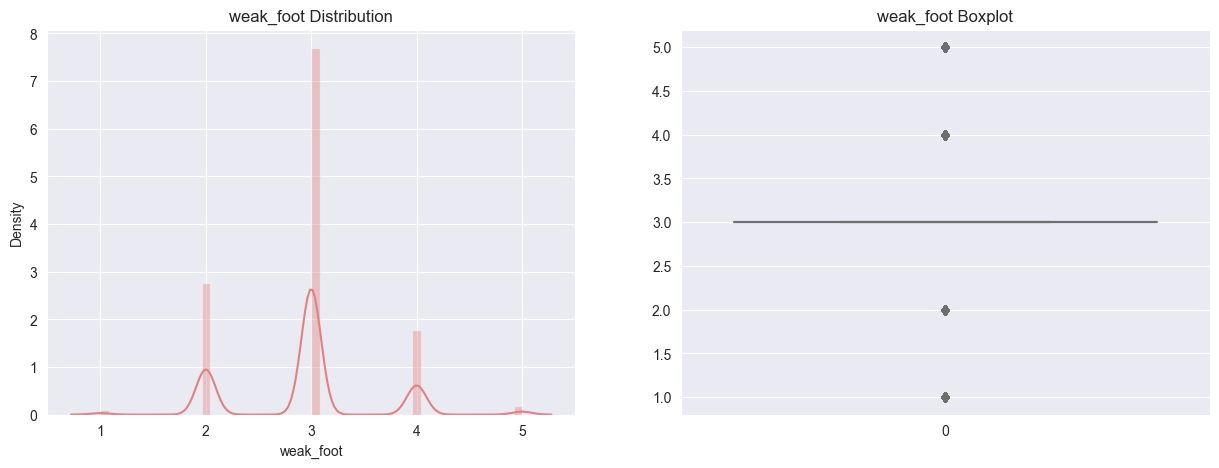

count   18944.00
mean        2.94
std         0.67
min         1.00
25%         3.00
50%         3.00
75%         3.00
max         5.00
Name: weak_foot, dtype: float64
Skewness: 0.219654
Kurtosis: 0.601850
****************************


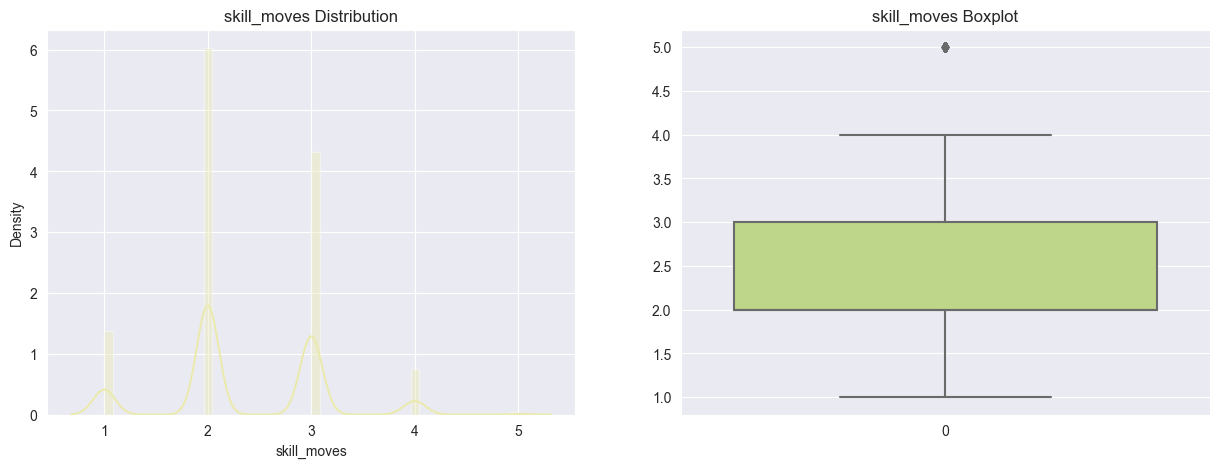

count   18944.00
mean        2.36
std         0.77
min         1.00
25%         2.00
50%         2.00
75%         3.00
max         5.00
Name: skill_moves, dtype: float64
Skewness: 0.225260
Kurtosis: -0.067779
****************************


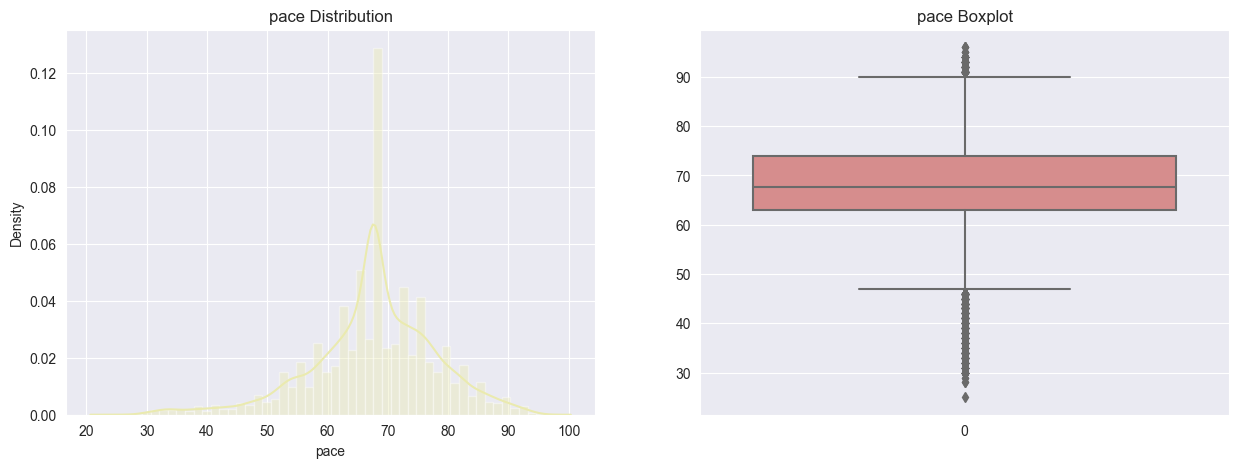

count   18944.00
mean       67.67
std        10.36
min        25.00
25%        63.00
50%        67.67
75%        74.00
max        96.00
Name: pace, dtype: float64
Skewness: -0.539655
Kurtosis: 1.101084
****************************


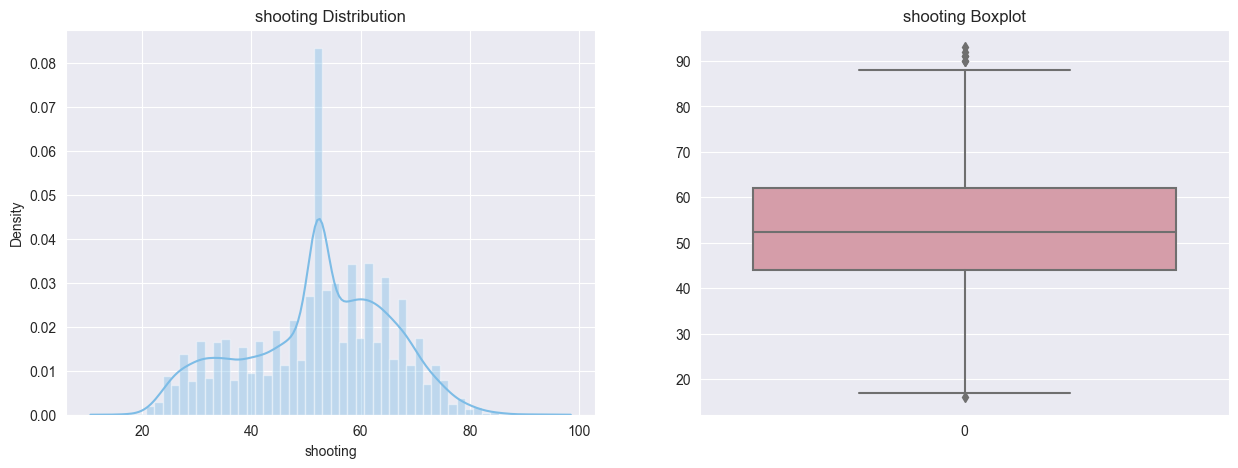

count   18944.00
mean       52.27
std        13.20
min        16.00
25%        44.00
50%        52.27
75%        62.00
max        93.00
Name: shooting, dtype: float64
Skewness: -0.287125
Kurtosis: -0.497940
****************************


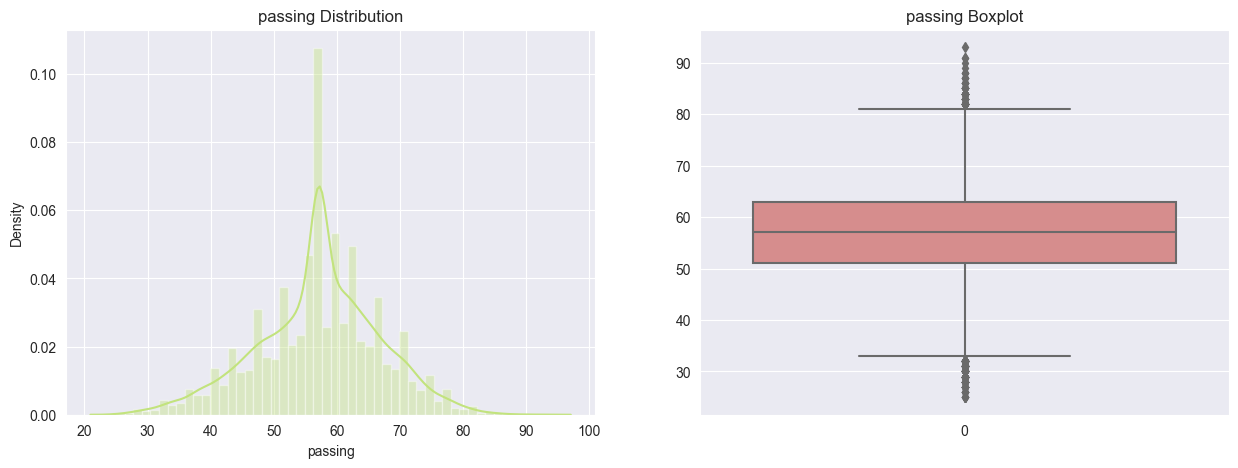

count   18944.00
mean       57.14
std         9.69
min        25.00
25%        51.00
50%        57.14
75%        63.00
max        93.00
Name: passing, dtype: float64
Skewness: -0.199215
Kurtosis: 0.218255
****************************


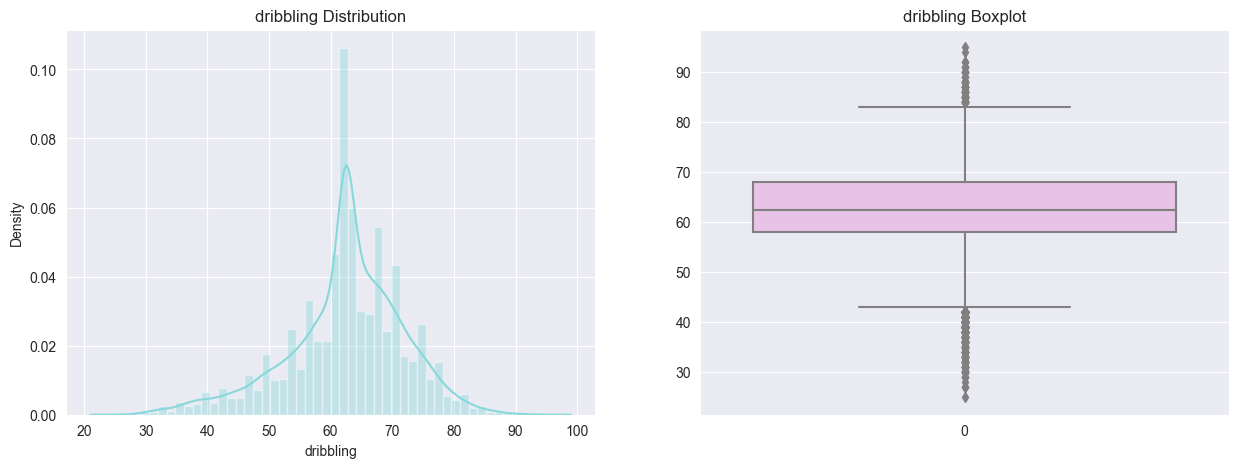

count   18944.00
mean       62.46
std         9.48
min        25.00
25%        58.00
50%        62.46
75%        68.00
max        95.00
Name: dribbling, dtype: float64
Skewness: -0.552649
Kurtosis: 0.782478
****************************


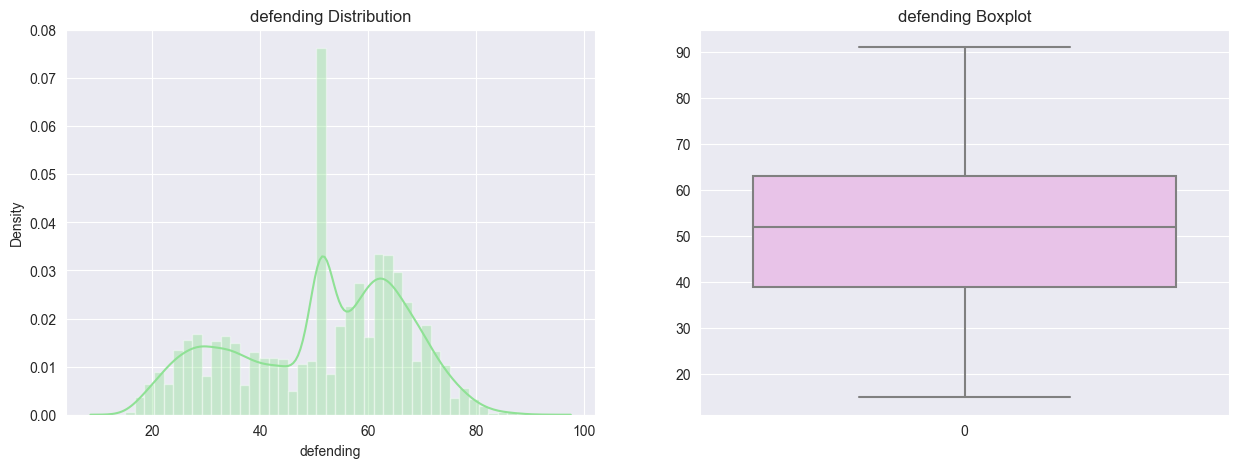

count   18944.00
mean       51.32
std        15.48
min        15.00
25%        39.00
50%        52.00
75%        63.00
max        91.00
Name: defending, dtype: float64
Skewness: -0.374699
Kurtosis: -0.801525
****************************


In [399]:
# distribution of the features

colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
          '#87D8DB','#C2E37D','#DF93A4','#DCB778','#C497DE']

features=['overall','potential','value_eur_m','wage_eur_m','international_reputation','weak_foot','skill_moves',
            'pace','shooting','passing','dribbling','defending']

def num_summary(dataframe, col_name):
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(dataframe[col_name], ax=ax[0], color=np.random.choice(colors))
    ax[0].set_title(col_name + ' Distribution')
    sns.boxplot(dataframe[col_name], ax=ax[1], color=np.random.choice(colors))
    ax[1].set_title(col_name + ' Boxplot')
    plt.show()
    print(dataframe[col_name].describe().T)
    print("Skewness: %f" % dataframe[col_name].skew())
    print("Kurtosis: %f" % dataframe[col_name].kurt())
    print("****************************")


for i in df[features].columns:
    num_summary(df,i)

Text(0.5, 1.0, 'Distribution of all Variables')

<Figure size 2000x2000 with 0 Axes>

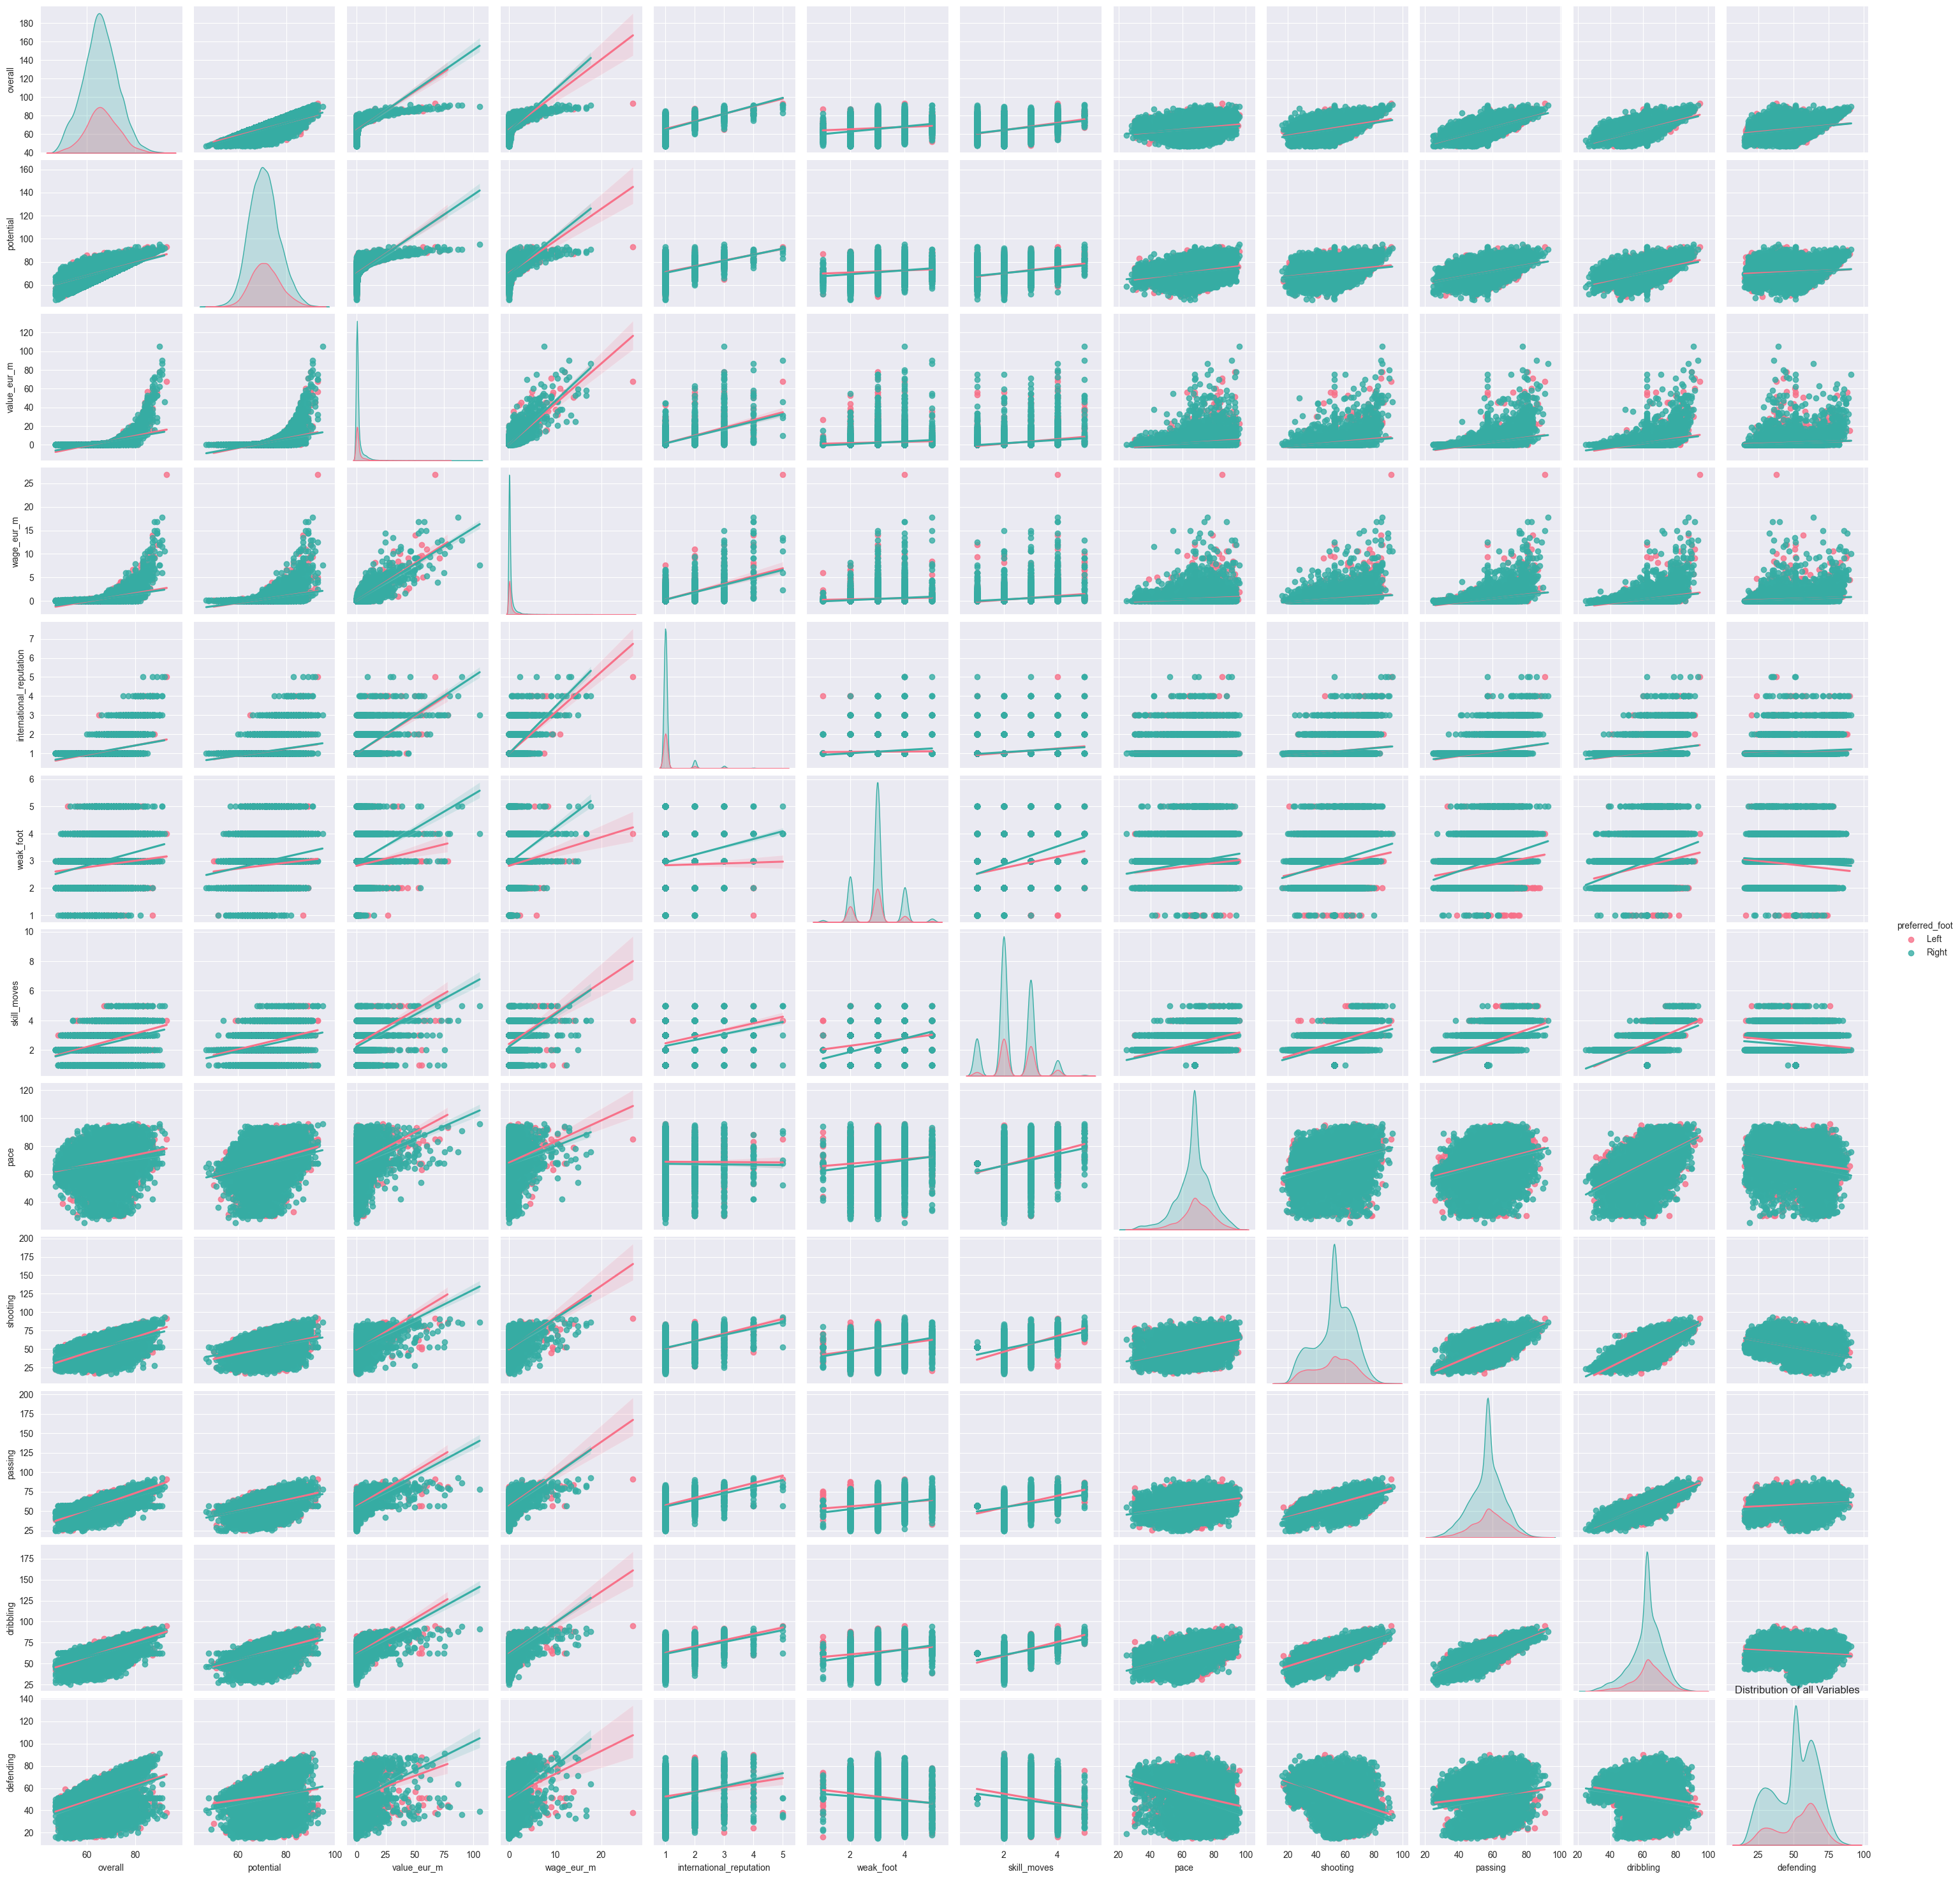

In [400]:
# pairplot of the selected features

features=['overall','potential','value_eur_m','wage_eur_m','international_reputation','weak_foot','skill_moves',
            'pace','shooting','passing','dribbling','defending',"preferred_foot"]


plt.figure(figsize=(20,20))
sns.set_style("darkgrid")
sns.pairplot(df[features],kind="reg",diag_kind="kde",palette="husl",hue="preferred_foot");
plt.title("Distribution of all Variables")

In [401]:
df.head()

sofifa_id                                         player_url  \
0  158023.00  https://sofifa.com/player/158023/lionel-messi/...   
1   20801.00  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2  200389.00  https://sofifa.com/player/200389/jan-oblak/210002   
3  188545.00  https://sofifa.com/player/188545/robert-lewand...   
4  190871.00  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name   age        dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini 33.00 1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro 35.00 1985-02-05   
2           J. Oblak                            Jan Oblak 27.00 1993-01-07   
3     R. Lewandowski                   Robert Lewandowski 31.00 1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior 28.00 1992-02-05   

   height_cm  weight_kg nationality            club_name  \
0     170.00      72.00   Argentina         FC Barcelona   
1     187.00      83.00    Portugal             Juventus   
2     188.00      87.00    Slovenia      Atlético Madrid   
3     184.00      80.00      Poland    FC Bayern München   
4     175.00      68.00      Brazil  Paris Saint-Germain   

              league_name  league_rank  overall  potential  value_eur_m  \
0  Spain Primera Division         1.00    93.00      93.00        67.50   
1         Italian Serie A         1.00    92.00      92.00        46.00   
2  Spain Primera Division         1.00    91.00      93.00        75.00   
3    German 1. Bundesliga         1.00    91.00      91.00        80.00   
4          French Ligue 1         1.00    91.00      91.00        90.00   

   wage_eur_m player_positions preferred_foot  international_reputation  \
0       26.88       RW, ST, CF           Left                      5.00   
1       10.56           ST, LW          Right                      5.00   
2        6.00               GK          Right                      3.00   
3       11.52               ST          Right                      4.00   
4       12.96          LW, CAM          Right                      5.00   

   weak_foot  skill_moves      work_rate   body_type real_face  \
0       4.00         4.00     Medium/Low      famous       Yes   
1       4.00         5.00       High/Low      famous       Yes   
2       3.00         1.00  Medium/Medium  not famous       Yes   
3       4.00         4.00    High/Medium  not famous       Yes   
4       5.00         5.00    High/Medium      famous       Yes   

   release_clause_eur_m team_position  team_jersey_number     joined  \
0                138.40      midfield               10.00 2004-07-01   
1                 75.90        attack                7.00 2018-07-10   
2                159.40    goalkeeper               13.00 2014-07-16   
3                132.00        attack                9.00 2014-07-01   
4                166.50        attack               10.00 2017-08-03   

   contract_valid_until  pace  shooting  passing  dribbling  defending  \
0               2021.00 85.00     92.00    91.00      95.00      38.00   
1               2022.00 89.00     93.00    81.00      89.00      35.00   
2               2023.00 67.67     52.27    57.14      62.46      51.32   
3               2023.00 78.00     91.00    78.00      85.00      43.00   
4               2022.00 91.00     85.00    86.00      94.00      36.00   

   physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
0   65.00      65.16        62.89       61.72        66.11     37.20   
1   77.00      65.16        62.89       61.72        66.11     37.20   
2   64.46      87.00        92.00       78.00        90.00     52.00   
3   82.00      65.16        62.89       61.72        66.11     37.20   
4   59.00      65.16        62.89       61.72        66.11     37.20   

   gk_positioning  player_traits  attacking_crossing  attacking_finishing  \
0           63.17           8.00               85.00                95.00   
1     

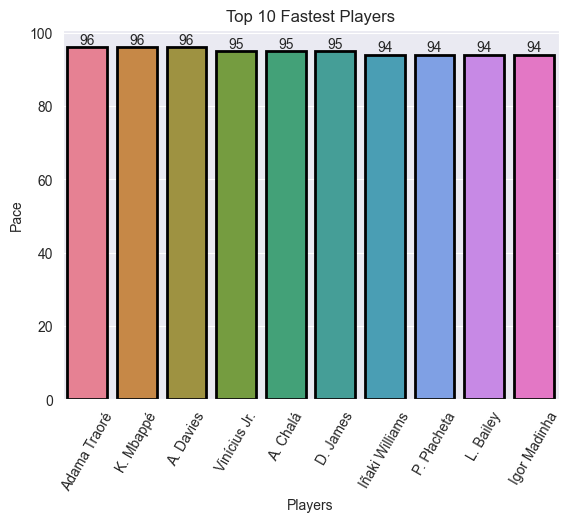

In [402]:
# top 10 fastest players

fs=df.sort_values(by="pace",ascending=False).head(10)

sns.set_style("darkgrid")
ax=sns.barplot(x=fs["short_name"],y=fs["pace"],palette="husl",edgecolor="black",linewidth=2)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=60)
plt.title("Top 10 Fastest Players")
plt.xlabel("Players")
plt.ylabel("Pace")
plt.show()

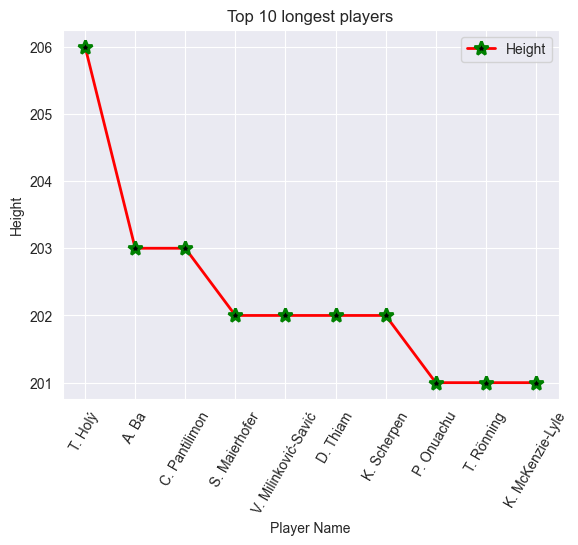

In [403]:
# top 10 longest players:

lg=df.sort_values(by='height_cm', ascending=False).head(10)

sns.set_style('darkgrid')
sns.lineplot(x='short_name', y='height_cm', data=lg, color='red', label='Height', marker='*', markersize=10,
             markerfacecolor='black', markeredgewidth=2, markeredgecolor="green", linewidth=2)
plt.title('Top 10 longest players')
plt.ylabel('Height')
plt.xlabel('Player Name')
plt.xticks(rotation=60)
plt.show()


In [404]:
# top 10 most valuable players in the world

vl= df.sort_values(by='value_eur_m', ascending=False).head(10)

px.bar(vl, x='short_name', y='value_eur_m', color='short_name', title='Top 10 Most Valuable(million) Players in the World',
       labels={'short_name':'Player Name', 'value_eur_m':'Value in Euros'},template='plotly_dark',text='value_eur_m')

In [405]:
# top 10 most valuable leagues



lv=df.groupby('league_name').mean().sort_values(by='league_value_T',ascending=False).head(10).reset_index()

px.pie(lv,values='league_value_T',names='league_name',title='Top 10 most valuable leagues',template='plotly_dark',width=800,height=500)

In [406]:
# top 10 weightiest players:

wt=df.sort_values(by='weight_kg',ascending=False).head(10)

px.scatter(wt,x="short_name",y='weight_kg',color='short_name',size='weight_kg',hover_name='short_name',title='Top 10 weightiest players',size_max=20,
           template='plotly_dark',labels={'weight_kg':'Weight in kg','short_name':'Player Name'},width=800,height=400,)



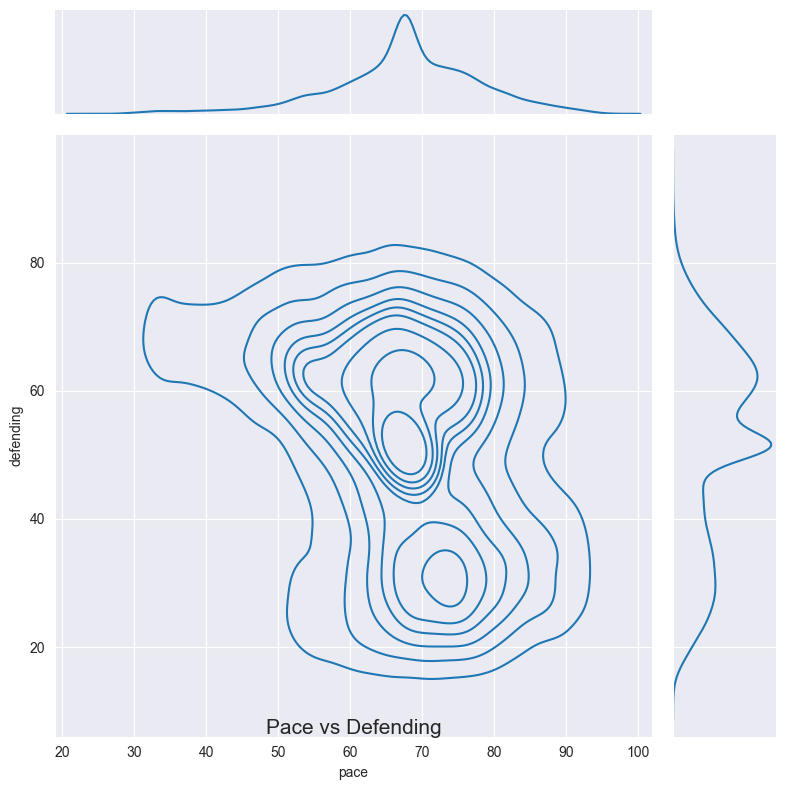

In [407]:
# PACE and DEFENDING:
sns.set_style("darkgrid")
sns.jointplot(x=df["pace"],y=df["defending"],kind="kde",palette="rocket",height=8)
plt.title("Pace vs Defending",fontsize=15,y=-0.01)
plt.show()

In [408]:
df.head()

sofifa_id                                         player_url  \
0  158023.00  https://sofifa.com/player/158023/lionel-messi/...   
1   20801.00  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2  200389.00  https://sofifa.com/player/200389/jan-oblak/210002   
3  188545.00  https://sofifa.com/player/188545/robert-lewand...   
4  190871.00  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name   age        dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini 33.00 1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro 35.00 1985-02-05   
2           J. Oblak                            Jan Oblak 27.00 1993-01-07   
3     R. Lewandowski                   Robert Lewandowski 31.00 1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior 28.00 1992-02-05   

   height_cm  weight_kg nationality            club_name  \
0     170.00      72.00   Argentina         FC Barcelona   
1     187.00      83.00    Portugal             Juventus   
2     188.00      87.00    Slovenia      Atlético Madrid   
3     184.00      80.00      Poland    FC Bayern München   
4     175.00      68.00      Brazil  Paris Saint-Germain   

              league_name  league_rank  overall  potential  value_eur_m  \
0  Spain Primera Division         1.00    93.00      93.00        67.50   
1         Italian Serie A         1.00    92.00      92.00        46.00   
2  Spain Primera Division         1.00    91.00      93.00        75.00   
3    German 1. Bundesliga         1.00    91.00      91.00        80.00   
4          French Ligue 1         1.00    91.00      91.00        90.00   

   wage_eur_m player_positions preferred_foot  international_reputation  \
0       26.88       RW, ST, CF           Left                      5.00   
1       10.56           ST, LW          Right                      5.00   
2        6.00               GK          Right                      3.00   
3       11.52               ST          Right                      4.00   
4       12.96          LW, CAM          Right                      5.00   

   weak_foot  skill_moves      work_rate   body_type real_face  \
0       4.00         4.00     Medium/Low      famous       Yes   
1       4.00         5.00       High/Low      famous       Yes   
2       3.00         1.00  Medium/Medium  not famous       Yes   
3       4.00         4.00    High/Medium  not famous       Yes   
4       5.00         5.00    High/Medium      famous       Yes   

   release_clause_eur_m team_position  team_jersey_number     joined  \
0                138.40      midfield               10.00 2004-07-01   
1                 75.90        attack                7.00 2018-07-10   
2                159.40    goalkeeper               13.00 2014-07-16   
3                132.00        attack                9.00 2014-07-01   
4                166.50        attack               10.00 2017-08-03   

   contract_valid_until  pace  shooting  passing  dribbling  defending  \
0               2021.00 85.00     92.00    91.00      95.00      38.00   
1               2022.00 89.00     93.00    81.00      89.00      35.00   
2               2023.00 67.67     52.27    57.14      62.46      51.32   
3               2023.00 78.00     91.00    78.00      85.00      43.00   
4               2022.00 91.00     85.00    86.00      94.00      36.00   

   physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
0   65.00      65.16        62.89       61.72        66.11     37.20   
1   77.00      65.16        62.89       61.72        66.11     37.20   
2   64.46      87.00        92.00       78.00        90.00     52.00   
3   82.00      65.16        62.89       61.72        66.11     37.20   
4   59.00      65.16        62.89       61.72        66.11     37.20   

   gk_positioning  player_traits  attacking_crossing  attacking_finishing  \
0           63.17           8.00               85.00                95.00   
1     

In [409]:
# Weight vs Pace:
sam=df.sample(2000)
px.scatter(sam,x="weight_kg",y="pace",hover_data=["short_name"],color=sam["team_position"],title="Weight vs Pace",template="plotly_dark",
           labels={"weight_kg":"Weight (kg)","pace":"Pace (m/s)","team_position":"Position"},trendline="ols")

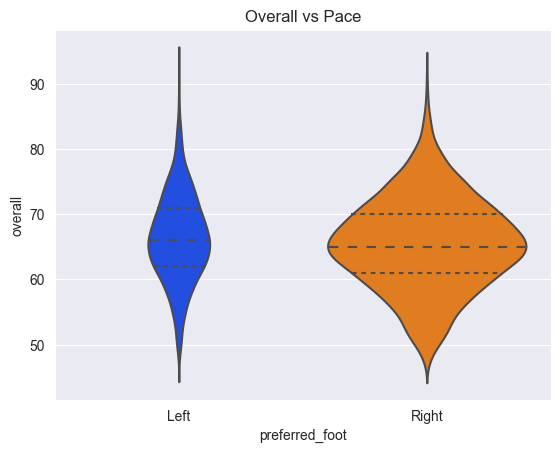

In [410]:

fig=sns.violinplot(y="overall", x="preferred_foot", data=df, palette="bright", split=True, scale="count", inner="quartile", bw=.2)
fig.set_title('Overall vs Pace')
fig.set_xlabel('preferred_foot')
fig.set_ylabel('overall')
plt.show()

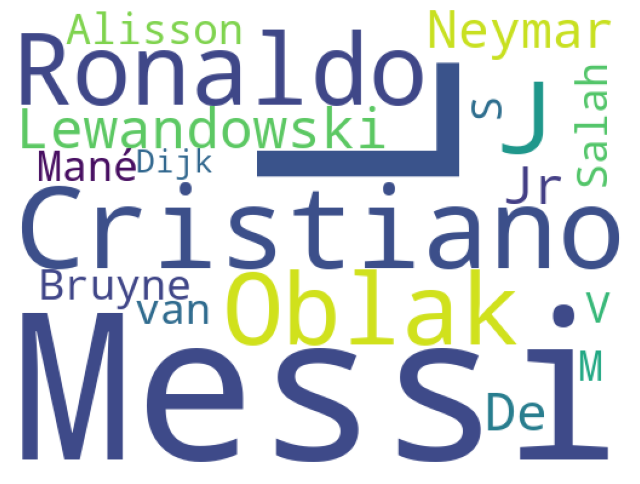

In [411]:
#top 10 player has the highest overall rating:
from wordcloud import WordCloud
ov= df.sort_values(by=['overall'],ascending=False).head(10)["short_name"]


plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(ov))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

In [412]:
# relationship between value and wage:
sam = df.sample(1000)

px.scatter(sam, y='value_eur_m', x='wage_eur_m', color='preferred_foot', title='Relationship between value and wage', trendline='ols',
           template="ggplot2",width=1000, height=600,labels={'value_eur_m':'Value (in millions)','wage_eur_m':'Wage (in millions)'},hover_name="short_name")


In [413]:
# most valuable 10 football clubs in the world:

vf=df.groupby("club_name")[["value_eur_m"]].sum().sort_values(by="value_eur_m",ascending=False).head(10)

px.scatter(vf,x=vf.index,y="value_eur_m",color="value_eur_m",size="value_eur_m",size_max=40,title="Top 10 Most Valuable Football Clubs in the World",
           template="plotly_dark",labels={"value_eur_m":"Value (in Million Euros)"},color_continuous_scale="ylgn",text=vf.value_eur_m)

In [414]:
# distribution of overall score based on preferred foot:
sam=df.sample(2000)
px.histogram(sam,x="overall",nbins=20,title="Histogram of Overall Score",labels={"overaal":"Overall Score"},color="preferred_foot",
             marginal="box",hover_data=df.columns,opacity=0.8,height=600,width=800,template="ggplot2")

In [415]:
# dribbling , pace , shooting relationship :

# take sample of 1000 rows from the dataset

sam=df.sample(1000)

px.scatter_3d(sam, x='dribbling', y='pace', z='shooting',
                color='preferred_foot',template="plotly_dark",title="Dribbling , Pace , Shooting Relationship")

<a id='8'></a>
<div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> OUTLIER DETECTION</div>

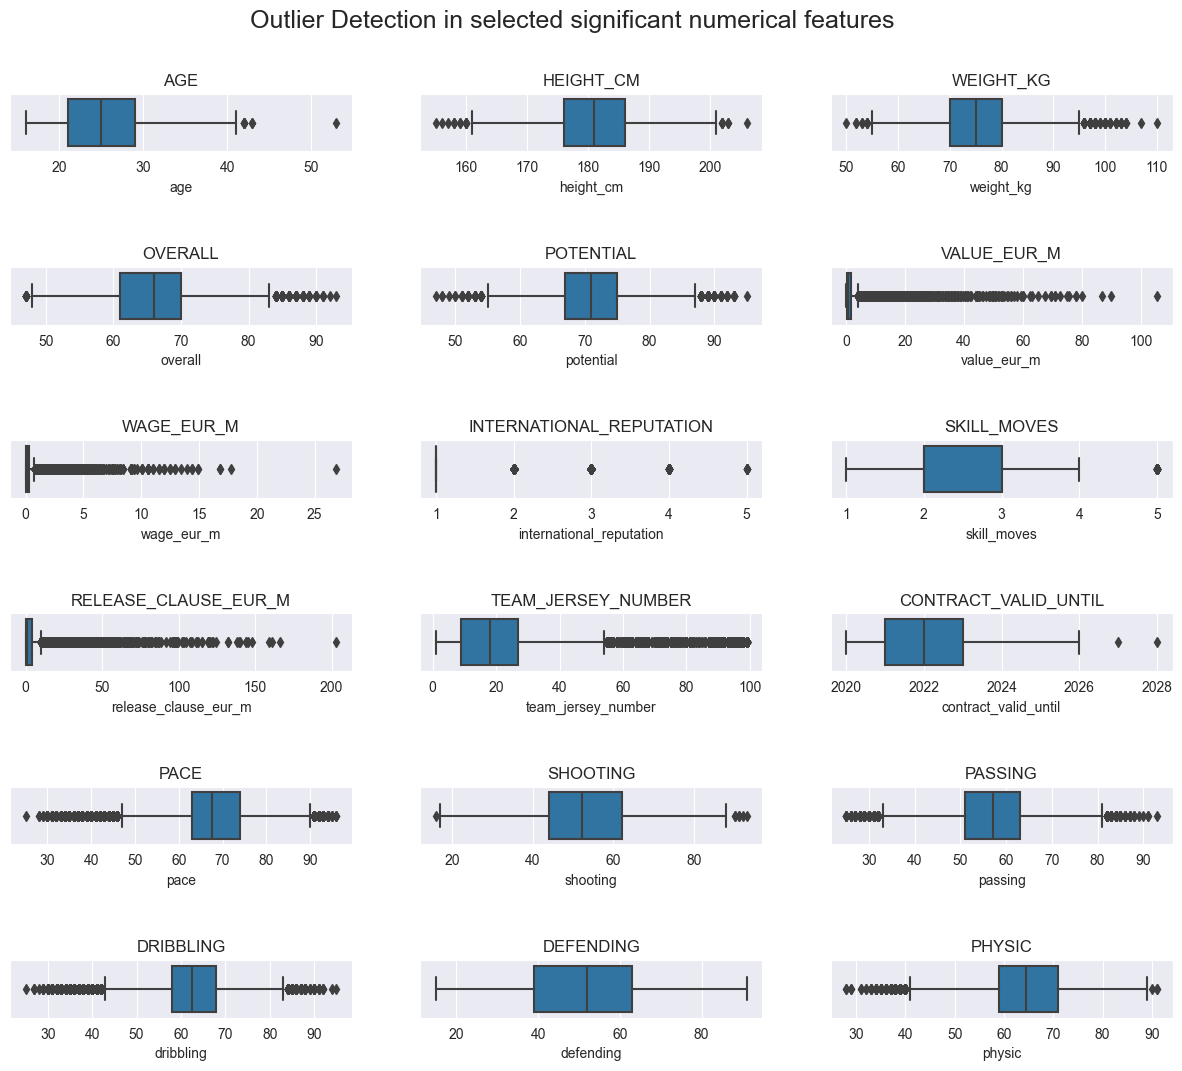

In [416]:
# Selecting related features:
num=df.select_dtypes(include=['int64','float64'])
num.drop(["sofifa_id","league_rank","weak_foot"],axis=1,inplace=True)


fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=2)
fig.suptitle("Outlier Detection in selected significant numerical features", fontsize=18, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(num.iloc[:,0:18], axs.ravel()):
    # filter df for ticker and plot on specified axes
    sns.boxplot(data=num, x=ticker, ax=ax)
    # chart formatting
    ax.set_title(ticker.upper())


plt.show()

In [417]:
#  outlier threshold:
def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75):
    q1=dataframe[col_name].quantile(q1)
    q3=dataframe[col_name].quantile(q3)
    IQR=q3-q1
    
    up_limit=q3+1.5*IQR
    low_limit=q1-1.5*IQR
    
    return low_limit,up_limit

# check outliers:
def check_outliers(dataframe,col_name):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name]<low_limit) | (dataframe[col_name]>up_limit)].any(axis=None):
        return True 
   
    else:
        return False

In [418]:
# replacing outliers with thresholds:
def replace_with_thresholds(dataframe, col):
    low_limit, up_limit = outlier_thresholds(dataframe, col)
    if low_limit > 0:
        dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit
    else:
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit

replace_with_thresholds(df,"age")
    
print("After filling with thresholds:")
print("Age:",check_outliers(df,"age"))


After filling with thresholds:
Age: False


<a id='9'></a>
<div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">DATA PREPROCCESING</div>

In [426]:
# label encoding:

df1=df.copy()
# if catorical column has 2 unique values, then use label encoder 
# if categorical column has more than 2 unique values and less than 10 unique values, then use one hot encoder.
#df1.drop(["sofifa_id","player_url","short_name","long_name","dob","joined","club_name","league_name","player_positions","nationality"],axis=1,inplace=True)
def label_encoder(df1, column_name):
    if df1[column_name].dtype == 'object':
        if df1[column_name].nunique() <= 2:
            le = LabelEncoder()
            df1[column_name] = le.fit_transform(df1[column_name])
            return df1
        elif df1[column_name].nunique() > 2  and df1[column_name].nunique() <= 10:
            ohe = OneHotEncoder()
            ohe_df1 = pd.DataFrame(ohe.fit_transform(df1[[column_name]]).toarray())
            ohe_df1.columns = [column_name + "_" + str(i) for i in ohe_df1.columns]
            df1 = df1.join(ohe_df1)
            df1 = df1.drop(column_name, axis=1)
            return df1
        else:
            return df1
        
    else:
        return df1
    
    
for i in df1.columns:
    df1 = label_encoder(df1, i)

In [427]:
X=df1.drop(["value_eur_m"],axis=1).values
y=df1["value_eur_m"].values.reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (15155, 80)
X_test shape:  (3789, 80)
y_train shape:  (15155, 1)
y_test shape:  (3789, 1)


In [428]:
# standization and normalization data

rb=RobustScaler()
X_train=rb.fit_transform(X_train)
X_test=rb.transform(X_test)

<a id='10'></a>
<div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">MODEL TRAINING AND EVALUATING</div>

In [434]:
# regression algorithms



lr=LinearRegression()
svr=SVR()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gr=GradientBoostingRegressor()
knn=KNeighborsRegressor()
gb=GaussianProcessRegressor()


models = [ lr, svr, dt, rf, gr, knn,gb]
overral=pd.DataFrame(columns=["Model","R2 Score",
                              "RMSE","MAE","MSE"])
for model in models:
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    
    
    overral=overral.append({"Model":model.__class__.__name__,
                            "R2 Score":r2,
                            "RMSE":rmse,
                            "MAE":mae,
                            "MSE":mse},ignore_index=True)
    

overral=overral.sort_values(by="R2 Score",ascending=False)
overral=overral.style.background_gradient(cmap="viridis")
overral

#### According to evaluation metrics, the best model is GradientBoostingRegressor with 0.985 R2 score and 0.65 RMSE score. I will use this model to predict the value of the players in the test dataset.

<a id='11'></a>
<div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">PCA / PRINCIPAL COMPONENT ANALYSIS</div>

In [450]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [451]:

# model traning after PCA
lr=LinearRegression()
svr=SVR()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gr=GradientBoostingRegressor()
knn=KNeighborsRegressor()
gb=GaussianProcessRegressor()


models = [ lr, svr, dt, rf, gr, knn,gb]
overral=pd.DataFrame(columns=["Model","R2 Score",
                              "RMSE","MAE","MSE"])
for model in models:
    
    model.fit(X_train_pca,y_train)
    y_pred=model.predict(X_test_pca)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    
    
    overral=overral.append({"Model":model.__class__.__name__,
                            "R2 Score":r2,
                            "RMSE":rmse,
                            "MAE":mae,
                            "MSE":mse},ignore_index=True)
    

overral=overral.sort_values(by="R2 Score",ascending=False)
overral=overral.style.background_gradient(cmap="viridis")
overral

<a id='12'></a>
<div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">MODEL TUNING</div>

In [452]:
gb_params={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
            'max_depth': [3, 5, 7, 9, 11],
            'min_samples_leaf': [1, 2, 3, 4, 5],
            'max_features': [0.1, 0.3, 0.5, 0.7, 0.9]}

gv=GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),param_grid=gb_params,cv=5,n_jobs=-1,verbose=1)
gv.fit(X_train_pca,y_train)

print(gv.best_params_)
print(gv.best_score_)


Fitting 5 folds for each of 625 candidates, totalling 3125 fits
{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 0.1, 'min_samples_leaf': 3}
0.8868191962166199


In [453]:
# final model:
gr=GradientBoostingRegressor(learning_rate=0.05,max_depth=5,max_features=0.1,min_samples_leaf=3,min_samples_split=5,n_estimators=100,random_state=42)
overral=pd.DataFrame(columns=["Model","R2 Score",
                              "RMSE","MAE","MSE"])

    
gr.fit(X_train_pca,y_train)
y_pred=gr.predict(X_test_pca)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
    
    
overral=overral.append({"Model":model.__class__.__name__,
                            "R2 Score":r2,
                            "RMSE":rmse,
                            "MAE":mae,
                            "MSE":mse},ignore_index=True)
    

overral=overral.sort_values(by="R2 Score",ascending=False)
overral=overral.style.background_gradient(cmap="viridis")
overral

<a id='12'></a>
<div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">CONCLUSION</div>

* In this project, I aimed to predict the value of FIFA 21 players based on various features such as their age, overall rating, potential, and performance attributes. My predictive model achieved an impressive R2 score of 0.89, indicating that approximately 89% of the variance in the players' values can be explained by my model.